In [1016]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib import style
import re
import string
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\syedd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\syedd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\syedd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1017]:
#Extract Data
Data_Agoda=pd.read_csv("D:/WebScraping/Agoda_2024-10-01_2024-10-03_Kuala Lumpur.csv")
Data_MHholidays=pd.read_csv("D:/WebScraping/MHHolidays_2024-10-01_2024-10-03_ Kuala Lumpur.csv")
Data_Expedia=pd.read_csv("D:/WebScraping/Expedia_2024-10-01_2024-10-03_Kuala Lumpur.csv")
Data = pd.concat([Data_Agoda, Data_MHholidays, Data_Expedia], ignore_index=True)


In [1018]:
len(Data_Agoda)
len(Data_MHholidays)

74

In [1019]:
#Drop row if the value price is zero
Clean_Data=Data.loc[(Data["Price(Rm)"]!=0)]
Clean_Data

,Pax,Check In,Check Out,Place,Web,Name Hotel,Price(Rm),Ratings
0,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Sky Suites KLCC by Autumn Suites Premium Stay,160.0,7.6
2,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Swiss Garden Residence Kuala Lumpur,112.0,7.7
4,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Tropicana The Residence By Klcc,365.0,8.6
5,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Regalia Residence @ KLCC View Sky Pool by KC,78.0,7.6
6,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Arte Mont Kiara By Awesomestay,117.0,7.2
...,...,...,...,...,...,...,...,...
217,"2 travellers, 1 room",2024-10-01,2024-10-03,Kuala Lumpur,Expedia,"InterContinental Kuala Lumpur, an IHG Hotel",32.0,9.0
218,"2 travellers, 1 room",2024-10-01,2024-10-03,Kuala Lumpur,Expedia,Sunway Putra Hotel Kuala Lumpur,311.0,8.6
219,"2 travellers, 1 room",2024-10-01,2024-10-03,Kuala Lumpur,Expedia,Dorsett Kuala Lumpur,360.0,8.0
220,"2 travellers, 1 room",2024-10-01,2024-10-03,Kuala Lumpur,Expedia,"Alila Bangsar, Kuala Lumpur",510.0,9.2


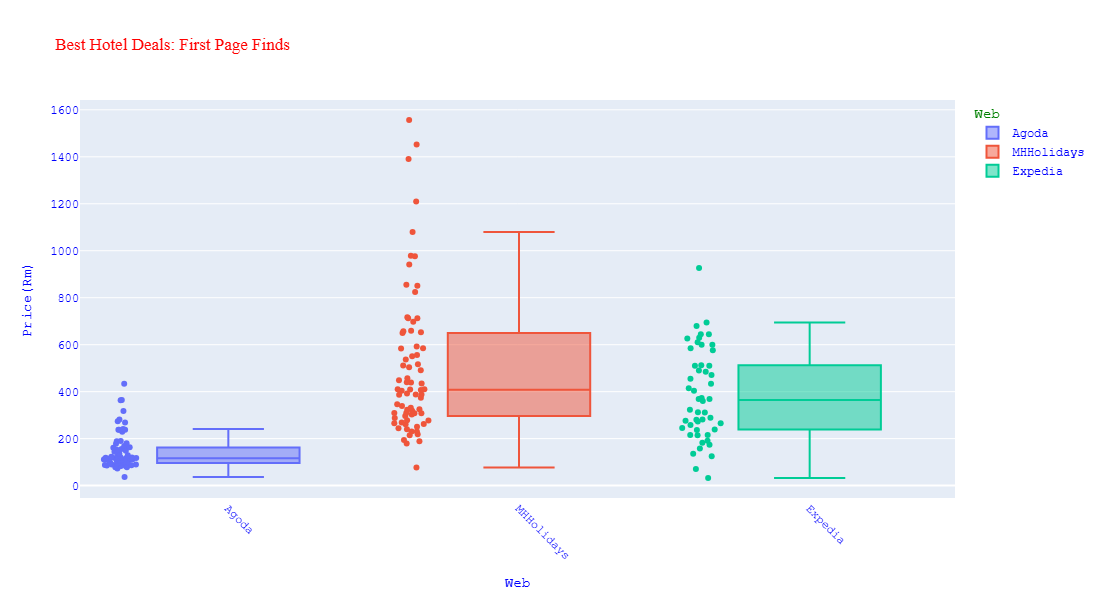

In [1020]:
fig=px.box(Clean_Data,y="Price(Rm)",x="Web",points="all",color="Web",title="Best Hotel Deals: First Page Finds")
fig.update_layout(xaxis={'tickangle': 45},
                  font_family="Courier New",
                  font_color="blue",
                  title_font_family="Times New Roman",
                  title_font_color="red",
                  legend_title_font_color="green",
                  width=800, 
                  height=600)
fig.show()

*After web scraping on first page with three hotel websites between date 01-10-2024 to 03-10-2024, we can see that clearly in the terms of best deal price, Agoda has better price than another which the median price is around RM117. This situation give an ideal price for customer want to save money upon via vacation. The first page view, Agoda give more cheap value which can excited the customer to rent the hotel through the website. Compared to another website, the first page of MHHolidays and Expedia has higher prices which can affect the customer's first point of view. This could lead to a lower conversion rate for MHHolidays and Expedia as customers may be more likely to choose Agoda due to its more affordable pricing. In additional, the average price for hotel booking on Agoda has very low price compare to another website which only Rm104.72. This make agoda an ideal option for hotel booking compare to another website.*

In [1022]:
#Graph for comparison for first page based on web
Data_by_website=Clean_Data.groupby('Web')["Price(Rm)"].sum().reset_index()
Length=[len(Data_Agoda),len(Data_Expedia),len(Data_MHholidays)]
Data_by_website["Length"]=Length
Data_by_website["Average Price (Rm)"]= Data_by_website["Price(Rm)"]/Data_by_website["Length"]
print(Data_by_website)

          Web  Price(Rm)  Length  Average Price (Rm)
0       Agoda  10263.000      98          104.724490
1     Expedia  19278.000      50          385.560000
2  MHHolidays  37177.345      74          502.396554


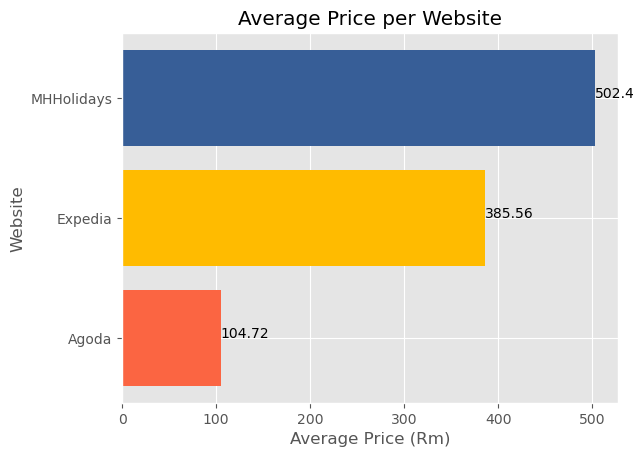

In [1023]:
style.use("ggplot")
plt.barh(Data_by_website["Web"],round(Data_by_website['Average Price (Rm)'],2), color=[ "#FB6542", "#FFBB00","#375E97"])
plt.xlabel("Average Price (Rm)")
plt.ylabel("Website")
plt.title("Average Price per Website")
for index, value in enumerate(round(Data_by_website['Average Price (Rm)'],2)):
    plt.text(value, index,str(value))
plt.show()

In [1025]:
#Reason why Agoda is cheapest
#Performing Text Analysis
Text_Data=Data[["Web","Name Hotel"]]
Text_Data_Agoda=Text_Data.loc[(Data["Web"]=="Agoda")].drop("Web",axis=1).to_string()
Text_Data_Expedia=Text_Data.loc[(Data["Web"]=="Expedia")].drop("Web",axis=1).to_string()
Text_Data_MHHolidays=Text_Data.loc[(Data["Web"]=="MHHolidays")].drop("Web",axis=1).to_string()
Text_Data_Agoda

"                                                            Name Hotel\n0                        Sky Suites KLCC by Autumn Suites Premium Stay\n1                                         Soho suites KLCC by Homestay\n2                                  Swiss Garden Residence Kuala Lumpur\n3                                        Eaton Residences KLCC by Luna\n4                                      Tropicana The Residence By Klcc\n5                         Regalia Residence @ KLCC View Sky Pool by KC\n6                                       Arte Mont Kiara By Awesomestay\n7                            Expressionz Professional Suites  Wodages \n8                                          Greystone One Bukit Ceylon \n9                                             Casa Residency Apartment\n10                                         Yemala Suites @ Vortex KLCC\n11                              Alanis & Core Suite Klia By Dreamscape\n12                                      Legasi Kampung Baru Gue

In [1026]:
#Text Data Cleaning
def preprocess_text(text):
    text=text.lower()
    text=re.sub(r'\d+',"",text) #remove digits
    text=re.sub(r'[^\w\s]',"",text) #remove special character
    #Tokenize the text
    tokens = nltk.word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    stop_words =set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

def perform_lemmatization(tokens):
    lemmatizer =nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

def clean_text(text):
    tokens= preprocess_text(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatized_tokens=perform_lemmatization(filtered_tokens)
    clean_text= " ".join(lemmatized_tokens)
    return clean_text

cleaned_data_agoda=clean_text(Text_Data_Agoda)
cleaned_data_Expedia=clean_text(Text_Data_Expedia)
cleaned_data_MHHolidays=clean_text(Text_Data_MHHolidays)
pattern = r"\b(le|h|v|hote|q|ihg|e|lrt|sentral|min|neu|one|s|bukit|w|train|bintang|pool|u|de|bed|st|kl|sunway|pyramid|putrajaya|klcc|mall|connected|kuala lumpur|name|wifi|damansara|bukit bintang|pj|klia|mbps|travel|r|b|neflix|home|sepang|nanas|est|pax|bangsar|kota warisan|damansra perdana|perfect|bedroom|promoconnected)\b"
cleaned_data_agoda = re.sub(pattern, "", cleaned_data_agoda)
cleaned_data_Expedia = re.sub(pattern, "", cleaned_data_Expedia)
cleaned_data_MHHolidays = re.sub(pattern, "", cleaned_data_MHHolidays)
print(cleaned_data_agoda)

 hotel sky suite  autumn suite premium stay soho suite  homestay swiss garden residence  eaton residence  luna tropicana residence  regalia residence  view sky  kc arte mont kiara awesomestay expressionz professional suite wodages greystone   ceylon casa residency apartment yemala suite vortex  alanis core suite  dreamscape legasi kampung baru guesthouse eaton residence  infinity  view ceylonz suite nr pavilion  yoursuperhost ekocheras cozy suite guestonic sky suite  luna suite platinum  luxury suite ceylonz suite edenzpace greystone colony  time square service apartment   getaway tamarind suite  chamber premier suite   dorsett    pavilion  expressionz suite  robertson   san eclipse dorsett residence    space axon    time suite establishment    loop suite chrisenbel suite pinnacle  ginger pinnacle  infini suite scarletz suite  axon   residence  space arte cheras premium suite iluxhome arte plus ampang awesomestay dmajestic place widebed alanis suite netflix   infini suite continew resi

In [1027]:
# Using dictionary comprehension + count() + split()
Data_Agoda = {key: cleaned_data_agoda.count(key) for key in cleaned_data_agoda.split()}
Data_Expedia = {key: cleaned_data_Expedia.count(key) for key in cleaned_data_Expedia.split()}
Data_MHHolidays = {key: cleaned_data_MHHolidays.count(key) for key in cleaned_data_MHHolidays.split()}
# Remove words with frequency below 1
Data_Agoda = {key: value for key, value in Data_Agoda.items() if value > 1}
Data_Expedia = {key: value for key, value in Data_Expedia.items() if value > 1}
Data_MHHolidays= {key: value for key, value in Data_MHHolidays.items() if value > 1}
# Printing result
print("The words frequency : " + str(Data_Agoda))

#from dictionary to a Dataframe
WordData_Agoda = pd.DataFrame.from_dict(Data_Agoda, orient='index', columns=['Frequency']).reset_index()
WordData_Expedia = pd.DataFrame.from_dict(Data_Expedia, orient='index', columns=['Frequency']).reset_index()
WordData_MHHolidays = pd.DataFrame.from_dict(Data_MHHolidays, orient='index', columns=['Frequency']).reset_index()

The words frequency : {'hotel': 2, 'sky': 8, 'suite': 52, 'premium': 3, 'stay': 14, 'soho': 2, 'homestay': 7, 'residence': 17, 'eaton': 2, 'luna': 3, 'tropicana': 2, 'regalia': 4, 'view': 4, 'arte': 5, 'mont': 2, 'kiara': 2, 'awesomestay': 4, 'expressionz': 2, 'greystone': 2, 'ceylon': 5, 'casa': 2, 'apartment': 3, 'vortex': 3, 'alanis': 2, 'guesthouse': 2, 'ceylonz': 2, 'pavilion': 7, 'ekocheras': 2, 'cozy': 3, 'guestonic': 2, 'platinum': 4, 'luxury': 2, 'colony': 2, 'time': 5, 'square': 4, 'service': 3, 'tamarind': 2, 'premier': 2, 'dorsett': 4, 'robertson': 2, 'san': 2, 'space': 2, 'axon': 8, 'pinnacle': 2, 'infini': 5, 'scarletz': 2, 'cheras': 3, 'plus': 2, 'dmajestic': 2, 'place': 2, 'netflix': 3, 'continew': 2, 'ark': 3, 'park': 2, 'moonlight': 2, 'host': 3, 'petaling': 2, 'jaya': 3, 'kia': 3, 'near': 2, 'jalil': 2, 'rasa': 2, 'sayang': 2, 'pavillion': 2, 'queen': 2, 'city': 2, 'la': 14, 'pacific': 2}


In [1028]:
print(WordData_MHHolidays)

         index  Frequency
0        hotel         40
1       resort          3
2      mercure          2
3          inn          2
4         city          6
5       centre          5
6       garden          2
7    signature          2
8    residence          4
9         park          4
10       grand          7
11       suite         10
12         ion          3
13        shah          3
14        alam          3
15     dorsett          2
16     pacific          3
17  doubletree          3
18      hilton          5
19     wyndham          2
20     regency          2
21   parkroyal          2
22    serviced          2
23    petaling          2
24        jaya          3
25       world          2
26       royal          4
27        sama          2
28      ascott          2
29        tree          4


In [1029]:
#Comparison hotel price and Ratings
TopFifteen_Agoda=WordData_Agoda.nlargest(15,"Frequency")
TopFifteen_Expedia=WordData_Expedia.nlargest(15,"Frequency")
TopFifteen_MHHolidays=WordData_MHHolidays.nlargest(15,"Frequency")
print(TopTen_Agoda)

           Frequency
suite             46
residence          9
stay               7
ceylon             6
city               5
view               5
promo              5
pavilion           5
axon               5
sky                5
homestay           4
loft               4
house              4
dorsett            4
host               4


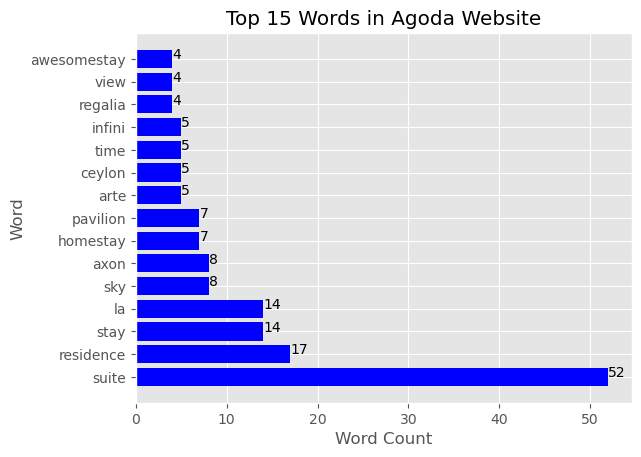

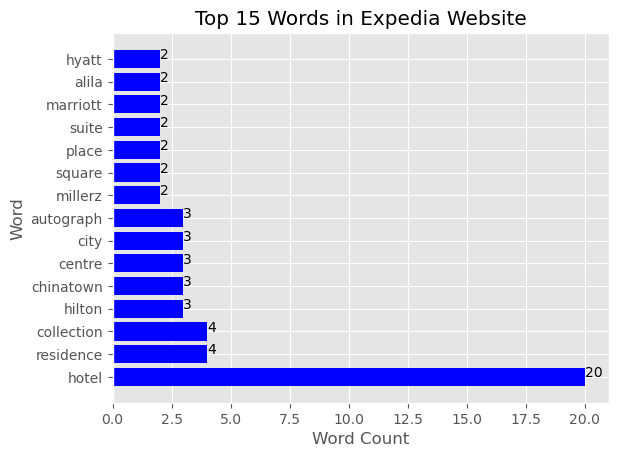

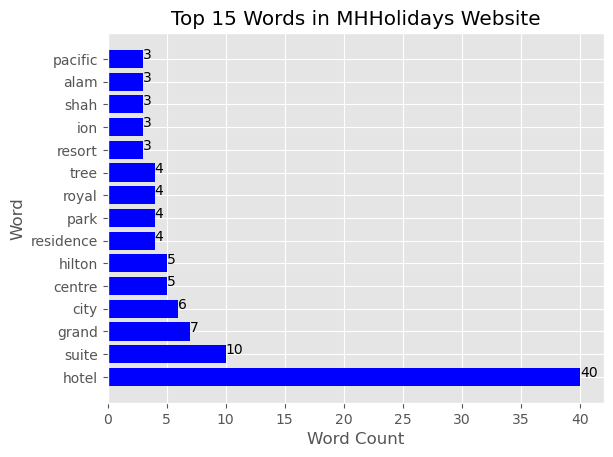

In [1030]:
def create_Barchart(dataframe,title):
    style.use("ggplot")
    #add colour
    colors = sns.color_palette("Set3", len(dataframe))
    # Create a dictionary mapping word indexes to their frequencies
    Data = dict(zip(dataframe['index'], dataframe['Frequency']))
    plt.barh(dataframe["index"], dataframe['Frequency'],color="Blue")
    for index, value in enumerate(dataframe['Frequency']):
        plt.text(value, index,str(value))
    # setting label of y-axis
    plt.ylabel("Word")
 
    # setting label of x-axis
    plt.xlabel("Word Count") 
    plt.title(title)
    plt.show()

create_Barchart(TopFifteen_Agoda, "Top 15 Words in Agoda Website")
create_Barchart(TopFifteen_Expedia, "Top 15 Words in Expedia Website")
create_Barchart(TopFifteen_MHHolidays, "Top 15 Words in MHHolidays Website")

*From the results, results show that Agoda offers a variety of accommodation options, including private homes, condos, and homestays, often referred to as "residences," "stays," "homestays," and "awesomestays." These options tend to be more affordable than the branded hotels offered by MHHolidays and Expedia, such as Hilton and city hotels. This difference in pricing is largely due to the nature of the accommodation and the associated costs involved in running and maintaining these different types of properties.*

In [1053]:
#Comparison Hotel Price in Sunway Velocity 
Clean_Data[Clean_Data['Name Hotel'].str.contains('Oriental', case=False)]

,Pax,Check In,Check Out,Place,Web,Name Hotel,Price(Rm),Ratings
157,2,2024-10-01,2024-10-03,Kuala Lumpur,MHHolidays,"Mandarin Oriental, Kuala Lumpur",1390.255,10.0
178,"2 travellers, 1 room",2024-10-01,2024-10-03,Kuala Lumpur,Expedia,"Mandarin Oriental, Kuala Lumpur",125.000,9.4


In [1055]:
#Comparison Hotel Price in klcc
Clean_Data[Clean_Data['Name Hotel'].str.contains('klcc', case=False)]

,Pax,Check In,Check Out,Place,Web,Name Hotel,Price(Rm),Ratings
0,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Sky Suites KLCC by Autumn Suites Premium Stay,160.000,7.6
4,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Tropicana The Residence By Klcc,365.000,8.6
5,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Regalia Residence @ KLCC View Sky Pool by KC,78.000,7.6
10,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Yemala Suites @ Vortex KLCC,238.000,8.1
14,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Ceylonz Suites nr Pavilion & KLCC by YourSuper...,123.000,8.4
16,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Sky Suites KLCC by Luna Suites,161.000,7.3
19,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Greystone Colony KLCC,82.000,7.9
24,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Expressionz Suites KLCC,119.000,8.1
32,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,Infini Suites@ Scarletz Suites KLCC,178.000,8.4
42,"1 adult,1 child1 room",2024-10-01,2024-10-03,Kuala Lumpur,Agoda,"Park View KLCC ,by DeLive Home",117.000,8.7
